In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v
import os
import random
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import imageio

In [2]:
fruit_class_training_folder = "/content/drive/MyDrive/Semester4/DS250/Training/Training_actual/Training/"
fruit_class_testing_folder = "/content/drive/MyDrive/Semester4/DS250/Training/Training_actual/Test/"
all_fruit_classes = os.listdir(fruit_class_training_folder)

def process_name(name):
  name = name.lower()
  names = name.split()
  return ("_").join(names)

In [32]:
i1 = imread(fruit_class_training_folder+"Apple Braeburn/10_100.jpg")
i2 = imread(fruit_class_training_folder+"Apple Red 3/0_100.jpg")

In [ ]:
i1.shape

(100, 100, 3)

In [ ]:
i1[0].shape

(100, 3)

In [ ]:
i1[0][0].shape

(3,)

In [ ]:
# skimage has RGB format, R in 0, G in 1, B in 2
# And shapes are read in vertical direction, then horizantal, and then into the plane

<html>
<img src="https://datacarpentry.org/image-processing/fig/02-chair-layers-rgb.png"></img>
</html>


In [4]:
# accessing blue pixels
i1[:,:,2]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

Text(0.5, 1.0, 'Blue')

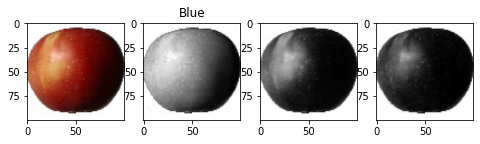

In [27]:
fig , axes = plt.subplots(1,4,figsize=(8,16))
axes[0].imshow(i1)
axes[1].imshow(i1[:,:,0],cmap='gray') # Red part
axes[1].set_title("Red")
axes[2].imshow(i1[:,:,1],cmap='gray') # Green part
axes[1].set_title("Green")
axes[3].imshow(i1[:,:,2],cmap='gray') # Blue part
axes[1].set_title("Blue")

In [28]:
i1[:,:,0].sum() # Gives sum of all red pixels in i1

1596068

In [30]:
1596068/10000

159.6068

In [33]:
i2[:,:,0].sum()/10000

147.4316

In [15]:
def give_r_g_b_average(image):
  return (image[:,:,0].sum()/10000,image[:,:,1].sum()/10000,image[:,:,2].sum()/10000)

In [16]:
rgb_averages_all = pd.DataFrame(columns=['class','name','r','g','b'])

In [48]:
# Let us try on first two classes, takes 8 seconds for two classes, so, 4 seconds per class
# Estimated time for 131 classes is around 10 minutes
# classes = ["Apple Braeburn","Apple Crimson Snow"]

# The code has been run and the dataframe has been saved, so I am commenting it out
# classes = os.listdir(fruit_class_testing_folder)
# class_ = []
# name_ = []
# #averages_ = []
# r = []
# g = []
# b = []
# for c in classes:
#   for im in os.listdir(fruit_class_training_folder+c):
#     class_.append(process_name(c))
#     name_.append(im)
#     image = imread(fruit_class_training_folder+c+"/"+im)
#     r_,g_ ,b_ = give_r_g_b_average(image))
#     r.append(r_)
#     g.append(g_)
#     b.append(b_)

In [52]:
# rgb_averages_all['class'] = class_
# rgb_averages_all['name'] = name_
# rgb_averages_all['rgb_average'] = averages_

In [53]:
rgb_averages_all

,class,name,rgb_average
0,mango,r_31_100.jpg,"(134.4092, 145.1394, 127.7387)"
1,mango,289_100.jpg,"(145.1286, 156.6415, 140.9338)"
2,mango,57_100.jpg,"(140.5686, 153.5127, 135.7984)"
3,mango,214_100.jpg,"(135.2377, 148.5672, 127.4618)"
4,mango,204_100.jpg,"(135.1739, 147.6737, 127.0035)"
...,...,...,...
67687,mandarine,r_158_100.jpg,"(196.8988, 145.657, 101.535)"
67688,mandarine,r_16_100.jpg,"(195.987, 154.5979, 104.4931)"
67689,mandarine,3_100.jpg,"(200.3679, 159.2701, 117.8436)"
67690,mandarine,289_100.jpg,"(203.6358, 162.4125, 118.593)"


In [54]:
# rgb_averages_all.to_csv("/content/drive/MyDrive/Semester4/DS250/rgb_averages_all.csv")

In [56]:
# rgb_averages_all['class'].unique() # This was to see that all classes got covered

array(['mango', 'mango_red', 'mangostan', 'maracuja', 'onion_red_peeled',
       'nectarine_flat', 'nut_pecan', 'nectarine', 'nut_forest',
       'mulberry', 'melon_piel_de_sapo', 'onion_white', 'onion_red',
       'peach', 'peach_2', 'pear_2', 'orange', 'papaya', 'peach_flat',
       'passion_fruit', 'pear_red', 'pear_forelle', 'pear_kaiser',
       'pear_monster', 'pear_abate', 'pear', 'pear_williams',
       'pepper_red', 'pepper_orange', 'pepper_green', 'pear_stone',
       'pepino', 'plum', 'pitahaya_red', 'pomegranate', 'plum_3',
       'pomelo_sweetie', 'pepper_yellow', 'physalis_with_husk', 'plum_2',
       'physalis', 'pineapple', 'pineapple_mini', 'salak', 'quince',
       'rambutan', 'potato_sweet', 'potato_white', 'redcurrant',
       'potato_red_washed', 'raspberry', 'potato_red', 'tomato_2',
       'tangelo', 'tomato_1', 'strawberry', 'tomato_3',
       'strawberry_wedge', 'tamarillo', 'tomato_cherry_red',
       'tomato_not_ripened', 'watermelon', 'tomato_yellow', 'tomat

In [3]:
rgb = pd.read_csv("/content/drive/MyDrive/Semester4/DS250/rgb_averages_all.csv")

In [8]:
rgb.drop("Unnamed: 0",axis=1,inplace=True)

In [24]:
rgb['rgb_average'] = rgb['rgb_average'].astype(object)
#np.array(rgb['rgb_average'][0]).astype(float)
import ast
avgs = rgb['rgb_average'].apply(ast.literal_eval).apply(np.array) # Use this line to convert string to arrays
#ast.literal_eval(rgb['rgb_average'][0]))
avgs

0        [134.4092, 145.1394, 127.7387]
1        [145.1286, 156.6415, 140.9338]
2        [140.5686, 153.5127, 135.7984]
3        [135.2377, 148.5672, 127.4618]
4        [135.1739, 147.6737, 127.0035]
                      ...              
67687      [196.8988, 145.657, 101.535]
67688     [195.987, 154.5979, 104.4931]
67689    [200.3679, 159.2701, 117.8436]
67690     [203.6358, 162.4125, 118.593]
67691    [200.0171, 160.1006, 104.1305]
Name: rgb_average, Length: 67692, dtype: object

In [25]:
avgs[0] + avgs[1]

array([279.5378, 301.7809, 268.6725])

In [34]:
sum(avgs) # We can sum velues in avgs

array([11807328.1625    ,  9987372.08410006,  8694915.15709992])

In [35]:
classes = rgb['class']

In [36]:
len(classes),len(avgs)

(67692, 67692)

In [38]:
all = rgb['class'].unique()
ca = {}
class_and_rgb_average = pd.DataFrame(columns=['class','avg'])
class_and_rgb_average['avg'] = class_and_rgb_average['avg'].astype(object)

In [45]:
srt = rgb.sort_values(by='class').reset_index()

In [47]:
srt
savgs = srt['rgb_average'].apply(ast.literal_eval).apply(np.array)

In [63]:
savgs[0]

array([171.1118, 121.955 ,  95.6678])

In [51]:
all.sort()

In [54]:
srt

,index,class,name,rgb_average
0,36052,apple_braeburn,234_100.jpg,"(171.1118, 121.955, 95.6678)"
1,35898,apple_braeburn,r_136_100.jpg,"(160.2804, 106.2241, 87.9908)"
2,35897,apple_braeburn,r_167_100.jpg,"(156.5726, 103.3642, 91.1505)"
3,35896,apple_braeburn,202_100.jpg,"(173.3722, 124.0393, 105.5544)"
4,35895,apple_braeburn,r_146_100.jpg,"(161.2619, 107.1403, 90.4649)"
...,...,...,...,...
67687,32600,watermelon,r_274_100.jpg,"(157.3795, 160.7162, 139.6181)"
67688,32599,watermelon,73_100.jpg,"(157.1584, 169.5405, 150.8651)"
67689,32598,watermelon,r_144_100.jpg,"(162.7911, 170.7187, 153.3591)"
67690,32574,watermelon,r_154_100.jpg,"(155.216, 163.7094, 144.6866)"


In [66]:
for c in all:
  cnt=0
  sum = np.array([0,0,0]).astype(float)
  for i,ent in enumerate(srt['class']):
    if ent==c:
      cnt+=1
      sum+=savgs[i]
  ca[c] = sum/cnt

In [67]:
ca

{'apple_braeburn': array([156.00409837, 101.32019004,  89.37390691]),
 'apple_crimson_snow': array([147.02901712,  94.30254775,  91.67396081]),
 'apple_golden_1': array([197.24224542, 180.35904479, 123.95267771]),
 'apple_golden_2': array([201.68587988, 195.70876809, 136.81603618]),
 'apple_golden_3': array([172.95683742, 167.38796424, 116.95375301]),
 'apple_granny_smith': array([166.65909634, 167.2115689 , 123.97472764]),
 'apple_pink_lady': array([170.82443882, 124.19338662, 104.04201711]),
 'apple_red_1': array([169.8909128 , 119.97897073, 108.93485976]),
 'apple_red_2': array([171.73527805, 130.12144248, 100.67440528]),
 'apple_red_3': array([162.48019744, 130.43505478, 109.47146573]),
 'apple_red_delicious': array([142.14748306, 121.23492327, 126.33458612]),
 'apple_red_yellow_1': array([190.35012358, 133.48471545, 101.53575549]),
 'apple_red_yellow_2': array([156.8249811 , 136.90440729, 103.16668958]),
 'apricot': array([184.47962785, 124.03704106,  90.28724756]),
 'avocado': ar

In [68]:
import pickle

In [69]:
with open("/content/drive/MyDrive/Semester4/DS250/class_rgb_average.pkl","wb") as f:
  pickle.dump(ca,f)

In [73]:
with open("/content/drive/MyDrive/Semester4/DS250/class_rgb_average.pkl","rb") as f:
    ac = pickle.load(f)

In [74]:
ac

{'apple_braeburn': array([156.00409837, 101.32019004,  89.37390691]),
 'apple_crimson_snow': array([147.02901712,  94.30254775,  91.67396081]),
 'apple_golden_1': array([197.24224542, 180.35904479, 123.95267771]),
 'apple_golden_2': array([201.68587988, 195.70876809, 136.81603618]),
 'apple_golden_3': array([172.95683742, 167.38796424, 116.95375301]),
 'apple_granny_smith': array([166.65909634, 167.2115689 , 123.97472764]),
 'apple_pink_lady': array([170.82443882, 124.19338662, 104.04201711]),
 'apple_red_1': array([169.8909128 , 119.97897073, 108.93485976]),
 'apple_red_2': array([171.73527805, 130.12144248, 100.67440528]),
 'apple_red_3': array([162.48019744, 130.43505478, 109.47146573]),
 'apple_red_delicious': array([142.14748306, 121.23492327, 126.33458612]),
 'apple_red_yellow_1': array([190.35012358, 133.48471545, 101.53575549]),
 'apple_red_yellow_2': array([156.8249811 , 136.90440729, 103.16668958]),
 'apricot': array([184.47962785, 124.03704106,  90.28724756]),
 'avocado': ar

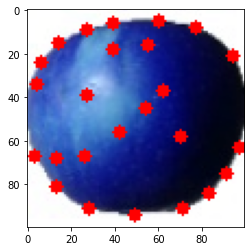

(<matplotlib.image.AxesImage at 0x7f4ede00d0d0>, None)

In [75]:
# Good features to track
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('/content/drive/MyDrive/Semester4/DS250/Training/Training_actual/Training/Apple Braeburn/0_100.jpg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
corners = cv.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv.circle(img,(x,y),3,255,-1)
plt.imshow(img),plt.show()

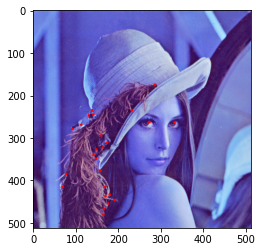

(<matplotlib.image.AxesImage at 0x7f4edea085d0>, None)

In [78]:
img = cv.imread('/content/drive/MyDrive/Semester4/DS250/lena.jpg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
corners = cv.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv.circle(img,(x,y),3,255,-1)
plt.imshow(img),plt.show()

[[[ 79 170]]

 [[118 184]]

 [[ 94 163]]

 [[131 221]]

 [[104 177]]

 [[ 62 151]]

 [[ 32 130]]

 [[ 41 161]]

 [[162  57]]

 [[182 213]]

 [[ 37 252]]

 [[169 206]]

 [[157  66]]

 [[ 67 164]]

 [[155 200]]

 [[172  81]]

 [[159  82]]

 [[132 191]]

 [[173  68]]

 [[ 54 255]]

 [[ 84 198]]

 [[174  96]]

 [[ 62 108]]

 [[142 193]]

 [[157 188]]] (25, 1, 2)


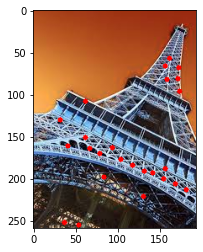

(<matplotlib.image.AxesImage at 0x7f4edebaf850>, None)

In [82]:
img = cv.imread('/content/drive/MyDrive/Semester4/DS250/eff1.jpeg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
corners = cv.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)
print(corners,corners.shape)
for i in corners:
    x,y = i.ravel()
    cv.circle(img,(x,y),3,255,-1)
plt.imshow(img),plt.show()

In [83]:
import numpy as np
import cv2 as cv
img = cv.imread('/content/drive/MyDrive/Semester4/DS250/eff1.jpeg')
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
sift = cv.SIFT_create()
kp = sift.detect(gray,None)
img=cv.drawKeypoints(gray,kp,img)

AttributeError: ignored